* https://www.gov.uk/guidance/mot-inspection-manual-for-private-passenger-and-light-commercial-vehicles
* https://www.data.gov.uk/dataset/e3939ef8-30c7-4ca8-9c7c-ad9475cc9b2f/anonymised-mot-tests-and-results
* https://www.gov.uk/government/news/mot-changes-20-may-2018

In [1]:
from dask.distributed import Client
from distributed import progress
from glob import glob
from operator import itemgetter
import dask.dataframe as dd
import csv
import pandas as pd

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 31.30 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46493,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 31.30 GiB
Comm: tcp://127.0.0.1:35081,Total threads: 3
Dashboard: http://127.0.0.1:38969/status,Memory: 7.83 GiB
Nanny: tcp://127.0.0.1:38269,


In [3]:
txt_files = glob('data/test_*.txt')
csv_files = glob('data/unzipped/**/*.csv', recursive=True)

files = txt_files + csv_files
len(files)

104

In [4]:
def sniff_dialect(file):
    with open(file) as csvfile:
        dialect = csv.Sniffer().sniff(csvfile.read(10000))
        dialect_info = dict(dialect.__dict__)
        dialect_info['file'] = file
    return dialect_info

In [5]:
dialects = [sniff_dialect(file) for file in files]

csv_info_df = (
    pd.DataFrame(dialects)
    .drop(columns=['__module__', '_name', '__doc__'])
    .set_index('file')
    .sort_index()
    .reset_index()
)

csv_info_df

,file,lineterminator,quoting,doublequote,delimiter,quotechar,skipinitialspace
0,data/test_item_2005.txt,\r\n,0,False,|,"""",False
1,data/test_item_2006.txt,\r\n,0,False,|,"""",False
2,data/test_item_2007.txt,\r\n,0,False,|,"""",False
3,data/test_item_2008.txt,\r\n,0,False,|,"""",False
4,data/test_item_2009.txt,\r\n,0,False,|,"""",False
...,...,...,...,...,...,...,...
99,data/unzipped/test_result_31869.csv,\r\n,0,False,|,"""",False
100,data/unzipped/test_result_31870.csv,\r\n,0,False,|,"""",False
101,data/unzipped/test_result_31871.csv,\r\n,0,False,|,"""",False
102,data/unzipped/test_result_31876.csv,\r\n,0,False,|,"""",False


In [6]:
csv_info_df.lineterminator.describe()

count      104
unique       1
top       \r\n
freq       104
Name: lineterminator, dtype: object

In [7]:
csv_info_df.skipinitialspace.describe()

count       104
unique        1
top       False
freq        104
Name: skipinitialspace, dtype: object

In [8]:
csv_info_df.delimiter.unique()

array(['|', ','], dtype=object)

In [9]:
results_files_df = csv_info_df[csv_info_df.file.str.contains('result')]
results_files_df

,file,lineterminator,quoting,doublequote,delimiter,quotechar,skipinitialspace
12,data/test_result_2005.txt,\r\n,0,False,|,"""",False
13,data/test_result_2006.txt,\r\n,0,False,|,"""",False
14,data/test_result_2007.txt,\r\n,0,False,|,"""",False
15,data/test_result_2008.txt,\r\n,0,False,|,"""",False
16,data/test_result_2009.txt,\r\n,0,False,|,"""",False
17,data/test_result_2010.txt,\r\n,0,False,|,"""",False
18,data/test_result_2011.txt,\r\n,0,False,|,"""",False
19,data/test_result_2012.txt,\r\n,0,False,|,"""",False
20,data/test_result_2013.txt,\r\n,0,False,|,"""",False
21,data/test_result_2014.txt,\r\n,0,False,|,"""",False


## Results

In [10]:
def read_results(file, sep):
    df = dd.read_csv(file,
                     delimiter=sep,
                     doublequote=False,
                     on_bad_lines='warn',
                     include_path_column=True,
                     parse_dates=['test_date'],
                     dtype_backend='pyarrow',
                     # engine='pyarrow',
                    )
    return df

def parse_dates_pd(df):
    df['first_use_date'] = pd.to_datetime(df['first_use_date'], format='ISO8601', errors='coerce')
    return df

def parse_dates_dd(df):
    df['first_use_date'] = dd.to_datetime(df['first_use_date'], format='ISO8601', errors='coerce')
    return df

In [11]:
result_records = results_files_df[['file', 'delimiter']].to_records(index=False)
ddfs = [read_results(file, sep) for file, sep in result_records]

In [12]:
ddf = (
    dd.concat(ddfs)
    #.map_partitions(parse_dates_pd) # pandas version
    .pipe(parse_dates_dd) # dask version
)

In [13]:
ddf.dtypes

test_id               int64[pyarrow]
vehicle_id            int64[pyarrow]
test_date             datetime64[ns]
test_class_id         int64[pyarrow]
test_type            string[pyarrow]
test_result          string[pyarrow]
test_mileage          int64[pyarrow]
postcode_area        string[pyarrow]
make                 string[pyarrow]
model                string[pyarrow]
colour               string[pyarrow]
fuel_type            string[pyarrow]
cylinder_capacity     int64[pyarrow]
first_use_date        datetime64[ns]
path                        category
dtype: object

Task exception was never retrieved
future: <Task finished name='Task-3315' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-3483' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-3405' cor

Task exception was never retrieved
future: <Task finished name='Task-3312' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-3333' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-3469' cor

Task exception was never retrieved
future: <Task finished name='Task-3347' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-3194' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-3438' cor

Task exception was never retrieved
future: <Task finished name='Task-2438' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2459' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2527' cor

Task exception was never retrieved
future: <Task finished name='Task-3063' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-3165' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-3168' cor

Task exception was never retrieved
future: <Task finished name='Task-2932' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2945' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-3052' cor

Task exception was never retrieved
future: <Task finished name='Task-2962' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2957' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2903' cor

Task exception was never retrieved
future: <Task finished name='Task-3297' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-3277' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-3265' cor

Task exception was never retrieved
future: <Task finished name='Task-3513' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-3563' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-3567' cor

Task exception was never retrieved
future: <Task finished name='Task-2086' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2080' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2022' cor

Task exception was never retrieved
future: <Task finished name='Task-2810' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2807' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2852' cor

Task exception was never retrieved
future: <Task finished name='Task-2811' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2221' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2250' cor

Task exception was never retrieved
future: <Task finished name='Task-2171' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-1986' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-1964' cor

Task exception was never retrieved
future: <Task finished name='Task-2068' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2008' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2095' cor

Task exception was never retrieved
future: <Task finished name='Task-2099' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-1921' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2281' cor

Task exception was never retrieved
future: <Task finished name='Task-3590' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-3587' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-3571' cor

Task exception was never retrieved
future: <Task finished name='Task-3604' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2445' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2309' cor

Task exception was never retrieved
future: <Task finished name='Task-2867' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2833' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-3565' cor

Task exception was never retrieved
future: <Task finished name='Task-2331' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2446' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2345' cor

Task exception was never retrieved
future: <Task finished name='Task-2844' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2860' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2815' cor

Task exception was never retrieved
future: <Task finished name='Task-2193' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2232' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2284' cor

Task exception was never retrieved
future: <Task finished name='Task-1993' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2049' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2156' cor

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_93725/1354886235.py", line 1, in <module>
    ddf.info(verbose=True)
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/dask/dataframe/core.py", line 6054, in info
    zip(computations.keys(), da.compute(*computations.values()))
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/dask/base.py", line 599, in compute
    results = schedule(dsk, keys, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 3226, in get
    results = self.gather(packed, asynchronous=asynchronous, direct=direct)
              

Task exception was never retrieved
future: <Task finished name='Task-2925' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2921' coro=<Client._gather.<locals>.wait() done, defined at /home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py:2189> exception=AllExit()>
Traceback (most recent call last):
  File "/home/giles/.miniconda3/envs/pydatalondon2023/lib/python3.11/site-packages/distributed/client.py", line 2198, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2915' cor

In [14]:
ddf.head()

,test_id,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date,path
0,804664368,256274986,2005-01-01,0,NT,P,23459,TF,FORD,UNCLASSIFIED,SILVER,PE,<NA>,NaT,/home/giles/Projects/DS/PyData/mot_pandas2_pol...
1,392603376,633988704,2005-01-01,0,NT,P,40961,E,LOTUS,UNCLASSIFIED,RED,PE,<NA>,NaT,/home/giles/Projects/DS/PyData/mot_pandas2_pol...
2,1894843206,1320781748,2005-01-01,0,NT,P,16416,S,VAUXHALL,UNCLASSIFIED,BLUE,PE,<NA>,NaT,/home/giles/Projects/DS/PyData/mot_pandas2_pol...
3,830908928,1263031090,2005-01-01,4,NT,P,93318,W,LAND ROVER,109 V8 S.W.,BLUE,PE,3528,1981-04-06,/home/giles/Projects/DS/PyData/mot_pandas2_pol...
4,727535460,1123257842,2005-01-01,4,NT,P,121930,RG,CITROEN,AX,WHITE,DI,1360,1993-08-31,/home/giles/Projects/DS/PyData/mot_pandas2_pol...


In [15]:
f = ddf.to_parquet('test_result.parquet', write_index=False, overwrite=True, compute=False).persist()
progress(f)

VBox()

Skipping line 115394: expected 14 fields, saw 16

Skipping line 281444: expected 14 fields, saw 16

Skipping line 46202: expected 14 fields, saw 16

Skipping line 86979: expected 14 fields, saw 16

Skipping line 361415: expected 14 fields, saw 16

Skipping line 566945: expected 14 fields, saw 16



### Roundtrip

In [20]:
ddf_result = dd.read_parquet('test_result.parquet')

In [17]:
# Note the differing dtypes
ddf_result.info(verbose=True)

<class 'dask.dataframe.core.DataFrame'>
Index: 639506962 entries, 0 to 791798
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   test_id            639506962 non-null      int64[pyarrow]
 1   vehicle_id         639506962 non-null      int64[pyarrow]
 2   test_date          639506962 non-null      datetime64[ns]
 3   test_class_id      639506962 non-null      int64[pyarrow]
 4   test_type          639506962 non-null      string
 5   test_result        639506962 non-null      string
 6   test_mileage       632574944 non-null      int64[pyarrow]
 7   postcode_area      639506962 non-null      string
 8   make               639506927 non-null      string
 9   model              639505681 non-null      string
10   colour             639506962 non-null      string
11   fuel_type          639506962 non-null      string
12   cylinder_capacity  638550168 non-null      int64[pyarrow]
13   first_use_date     639479303 

In [21]:
ddf_result.head()

,test_id,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date,path
0,804664368,256274986,2005-01-01,0,NT,P,23459,TF,FORD,UNCLASSIFIED,SILVER,PE,<NA>,NaT,/home/giles/Projects/DS/PyData/mot_pandas2_pol...
1,392603376,633988704,2005-01-01,0,NT,P,40961,E,LOTUS,UNCLASSIFIED,RED,PE,<NA>,NaT,/home/giles/Projects/DS/PyData/mot_pandas2_pol...
2,1894843206,1320781748,2005-01-01,0,NT,P,16416,S,VAUXHALL,UNCLASSIFIED,BLUE,PE,<NA>,NaT,/home/giles/Projects/DS/PyData/mot_pandas2_pol...
3,830908928,1263031090,2005-01-01,4,NT,P,93318,W,LAND ROVER,109 V8 S.W.,BLUE,PE,3528,1981-04-06,/home/giles/Projects/DS/PyData/mot_pandas2_pol...
4,727535460,1123257842,2005-01-01,4,NT,P,121930,RG,CITROEN,AX,WHITE,DI,1360,1993-08-31,/home/giles/Projects/DS/PyData/mot_pandas2_pol...


In [22]:
ddf_result.npartitions

854

In [23]:
rover_df = ddf_result.query('vehicle_id == 1238787680').compute()

In [24]:
rover_df

,test_id,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date,path
619621,523600018,1238787680,2005-07-29,4,NT,P,62931,CV,ROVER,200,RED,PE,1796,1997-09-08,/home/giles/Projects/DS/PyData/mot_pandas2_pol...
75461,566248504,1238787680,2006-08-11,4,NT,P,73606,CH,ROVER,200,RED,PE,1796,1997-09-08,/home/giles/Projects/DS/PyData/mot_pandas2_pol...
738312,608896990,1238787680,2007-07-13,4,NT,P,83496,CH,ROVER,200,RED,PE,1796,1997-09-08,/home/giles/Projects/DS/PyData/mot_pandas2_pol...
96799,651545476,1238787680,2008-07-17,4,NT,P,96680,CH,ROVER,200,RED,PE,1796,1997-09-08,/home/giles/Projects/DS/PyData/mot_pandas2_pol...
163440,694193962,1238787680,2009-07-22,4,NT,F,103333,NG,ROVER,200,RED,PE,1796,1997-09-08,/home/giles/Projects/DS/PyData/mot_pandas2_pol...
594408,736842448,1238787680,2009-08-03,4,RT,P,103575,NG,ROVER,200,RED,PE,1796,1997-09-08,/home/giles/Projects/DS/PyData/mot_pandas2_pol...
72562,779490934,1238787680,2010-07-15,4,NT,P,115188,LU,ROVER,200,RED,PE,1796,1997-09-08,/home/giles/Projects/DS/PyData/mot_pandas2_pol...
50693,822139420,1238787680,2011-07-11,4,NT,P,126169,LU,ROVER,200,RED,PE,1796,1997-09-08,/home/giles/Projects/DS/PyData/mot_pandas2_pol...
562174,864787906,1238787680,2012-07-17,4,NT,F,205404,LU,ROVER,200,RED,PE,1796,1997-09-08,/home/giles/Projects/DS/PyData/mot_pandas2_pol...
282107,907436392,1238787680,2012-07-20,4,RT,P,138108,LU,ROVER,200,RED,PE,1796,1997-09-08,/home/giles/Projects/DS/PyData/mot_pandas2_pol...


<Axes: xlabel='test_date'>

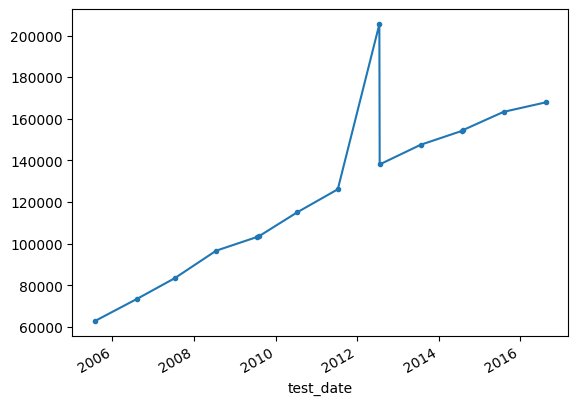

In [25]:
rover_df.set_index('test_date').test_mileage.plot(marker='.')

## Items

In [26]:
item_files_df = csv_info_df[csv_info_df.file.str.contains('item')]
item_files_df

,file,lineterminator,quoting,doublequote,delimiter,quotechar,skipinitialspace
0,data/test_item_2005.txt,\r\n,0,False,|,"""",False
1,data/test_item_2006.txt,\r\n,0,False,|,"""",False
2,data/test_item_2007.txt,\r\n,0,False,|,"""",False
3,data/test_item_2008.txt,\r\n,0,False,|,"""",False
4,data/test_item_2009.txt,\r\n,0,False,|,"""",False
5,data/test_item_2010.txt,\r\n,0,False,|,"""",False
6,data/test_item_2011.txt,\r\n,0,False,|,"""",False
7,data/test_item_2012.txt,\r\n,0,False,|,"""",False
8,data/test_item_2013.txt,\r\n,0,False,|,"""",False
9,data/test_item_2014.txt,\r\n,0,False,|,"""",False


In [27]:
def read_items(file, sep):
    df = dd.read_csv(file,
                     delimiter=sep,
                     dtype={'dangerous_mark': 'string[pyarrow]'},
                     dtype_backend='pyarrow',
                     # engine='pyarrow',
                    )
        
    return df

item_records = item_files_df[['file', 'delimiter']].to_records(index=False)
item_ddfs = [read_items(file, sep) for file, sep in item_records]

In [28]:
item_ddf = dd.concat(item_ddfs)

In [29]:
item_ddf.dtypes

test_id                      int64[pyarrow]
rfr_id                       int64[pyarrow]
rfr_type_code               string[pyarrow]
location_id                  int64[pyarrow]
dangerous_mark              string[pyarrow]
test_class_id                int64[pyarrow]
test_item_id                 int64[pyarrow]
minor_item                  string[pyarrow]
rfr_desc                    string[pyarrow]
rfr_loc_marker              string[pyarrow]
rfr_insp_manual_desc        string[pyarrow]
rfr_advisory_text           string[pyarrow]
test_item_set_section_id     int64[pyarrow]
dtype: object

In [30]:
item_ddf.info()
item_ddf.head()

<class 'dask.dataframe.core.DataFrame'>
Columns: 13 entries, test_id to test_item_set_section_id
dtypes: int64[pyarrow](6), string(1), string[pyarrow](6)

,test_id,rfr_id,rfr_type_code,location_id,dangerous_mark,test_class_id,test_item_id,minor_item,rfr_desc,rfr_loc_marker,rfr_insp_manual_desc,rfr_advisory_text,test_item_set_section_id
0,1343771031,8394,A,7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,1560692612,8394,F,13,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,1560692612,7977,F,9,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,1560692612,7916,A,7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,1560692612,7916,A,9,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [31]:
f = (
    item_ddf
    .to_parquet('item.parquet', write_index=False, overwrite=True, compute=False)
    .persist()
)

progress(f)

VBox()

In [33]:
item_ddf = dd.read_parquet('item.parquet')

In [34]:
rfr_counts = item_ddf.rfr_id.value_counts().compute()

In [35]:
rfr_counts

rfr_id
8394     106966369
31194     49855966
8141      45616711
8293      36441213
8310      30535430
           ...    
8574             1
8577             1
8838             1
8850             1
9716             1
Name: count, Length: 7493, dtype: int64[pyarrow]

## Reasons for rejection (test fail)

Not sure if this includes advisories

In [36]:
rfr_df = dd.read_csv('data/unzipped/dft_item_detail.csv', sep='|', dtype_backend='pyarrow')
rfr_df.info(verbose=True)
rfr_df.head()

<class 'dask.dataframe.core.DataFrame'>
RangeIndex: 20957 entries, 0 to 20956
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   rfr_id                    20957 non-null      int64[pyarrow]
 1   test_class_id             20957 non-null      int64[pyarrow]
 2   test_item_id              20957 non-null      int64[pyarrow]
 3   minor_item                20957 non-null      string[pyarrow]
 4   rfr_desc                  20957 non-null      string[pyarrow]
 5   rfr_loc_marker            20957 non-null      string[pyarrow]
 6   rfr_insp_manual_desc      20799 non-null      string[pyarrow]
 7   rfr_advisory_text         6780 non-null      string[pyarrow]
 8   test_item_set_section_id  20957 non-null      int64[pyarrow]
dtypes: int64[pyarrow](4), string[pyarrow](5)
memory usage: 3.7 MB


,rfr_id,test_class_id,test_item_id,minor_item,rfr_desc,rfr_loc_marker,rfr_insp_manual_desc,rfr_advisory_text,test_item_set_section_id
0,4,1,3,Y,missing,N,an obligatory lamp missing,<NA>,1
1,4,2,3,Y,missing,N,an obligatory lamp missing,<NA>,1
2,5,1,3,Y,damaged and function impaired,N,so damaged or deteriorated that its function i...,damaged but function not impaired,1
3,5,2,3,Y,damaged and function impaired,N,so damaged or deteriorated that its function i...,damaged but function not impaired,1
4,6,1,3,Y,deteriorated and function impaired,N,so damaged or deteriorated that its function i...,deteriorated but function not impaired,1


In [41]:
rfr_df.query('rfr_id == 8394').compute()

,rfr_id,test_class_id,test_item_id,minor_item,rfr_desc,rfr_loc_marker,rfr_insp_manual_desc,rfr_advisory_text,test_item_set_section_id
11001,8394,3,5655,Y,tread depth below requirements of 1.6mm,Y,The grooves of the tread pattern are not at le...,worn close to the legal limit,5650
11002,8394,4,5655,Y,tread depth below requirements of 1.6mm,Y,The grooves of the tread pattern are not at le...,worn close to the legal limit,5650
11003,8394,7,5655,Y,tread depth below requirements of 1.6mm,Y,The grooves of the tread pattern are not at le...,worn close to the legal limit,5650
